### Import the libraries

In [4]:
#import the required libearies 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


### Import the data

In [3]:
#Import the data 
df = pd.read_csv("Data/bodyPerformance.csv")
df.head()

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0      M      172.3      75.24        21.3       80.0     130.0   
1  25.0      M      165.0      55.80        15.7       77.0     126.0   
2  31.0      M      179.6      78.00        20.1       92.0     152.0   
3  32.0      M      174.5      71.10        18.4       76.0     147.0   
4  28.0      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B

### Ensure all the data is numerical

In [6]:
df_ml = df.drop(columns=['gender', 'class'])
df_ml

age  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  \
0      27.0      172.3      75.24        21.3       80.0     130.0       54.9   
1      25.0      165.0      55.80        15.7       77.0     126.0       36.4   
2      31.0      179.6      78.00        20.1       92.0     152.0       44.8   
3      32.0      174.5      71.10        18.4       76.0     147.0       41.4   
4      28.0      173.8      67.70        17.1       70.0     127.0       43.5   
...     ...        ...        ...         ...        ...       ...        ...   
13388  25.0      172.1      71.80        16.2       74.0     141.0       35.8   
13389  21.0      179.7      63.90        12.1       74.0     128.0       33.0   
13390  39.0      177.2      80.50        20.1       78.0     132.0       63.5   
13391  64.0      146.1      57.70        40.4       68.0     121.0       19.3   
13392  34.0      164.0      66.10        19.5       82.0     150.0       35.9   

       sit and bend forward_cm  sit-ups counts  broad jump_cm  
0                         18.4            60.0          217.0  
1                         16.3            53.0          229.0  
2                         12.0            49.0          181.0  
3                         15.2            53.0          219.0  
4                         27.1            45.0          217.0  
...                        ...             ...            ...  
13388                     17.4            47.0          198.0  
13389                      1.1            48.0          167.0  
13390                     16.4            45.0          229.0  
13391                      9.2             0.0           75.0  
13392                      7.1            51.0          180.0  

[13393 rows x 10 columns]

### K-Means is a distance based method and PCA required all the data to be normalized. Therefore, ensure to scale the data

In [7]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_ml_scaled = scalar.fit_transform(df_ml) 
df_ml_scaled.shape
df_ml_scaled

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

------------------------------------------------------------------------------------------------------------------------------------------------------------

### Find the optimium K value

- In this step we will figure the K value based on the "elbow method" 
- The initialization method is set to k-means++, because of it higher perfromance in comparision to Random. This is the default selection by the algorithm from scikit learn
- The n_init the number of different initialization sets will remain at 10. The best set will be chosen by algorithm
- The maximum iteration will remain unchanged at 300 to ensure convergence 
- The tol value will remain small at 0.0001 to avoid early convergence 
- We will be modifying the data therefore copy_x will stay at the default of True
- For K-means clustering algorithm of choice will keep at the Lloyd's K-Means default

[92209.16343547443, 80763.26726331926, 71405.57610214905, 66252.72467403219, 62240.72914633572, 59232.26942070304, 57055.84661907164, 55023.678439935946, 53325.82452688308, 51843.22960641088, 50474.49292545958, 49348.79844647557, 48375.83338716733, 47442.211213618655, 46613.96338983699, 45833.61194172246, 45246.9067680794, 44603.70614544386, 44026.30617617148, 43374.77523405829, 42744.21578425792, 42140.265603116066, 41579.22558053183]


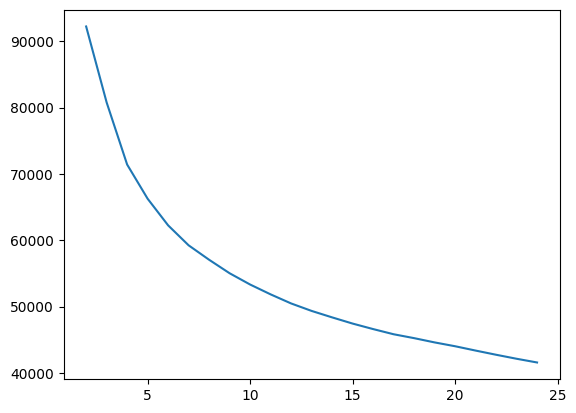

In [10]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings

SSD = []
for k in range(2,25,1): 
    ml_model = KMeans(n_clusters=k)
    ml_model.fit(df_ml_scaled)
    SSD.append(ml_model.inertia_)

print(SSD)
plt.plot(range(2,25,1),SSD) 
plt.show()

- Based on the "Eblow Method"  a K of 10 seems to satisify the method. Therefore, we will run the analysis with K being 10 


------------------------------------------------------------------------------------------------------------------------------------------------------------

### K-Means Analysis when K = 10

In [12]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')#  Will not show any of the warnings
ml_model = KMeans(n_clusters=10, random_state=101)
ml_model.fit(df_ml_scaled) #fit the scaled data
ml_model.predict(df_ml_scaled) #predict the scaled data 
print(len(ml_model.labels_) )


13393


In [13]:
#Add the results of the ML model label's to the main dataframe. This will show you which rows have been seperated 
df['Cluster'] = ml_model.labels_
print(df.sort_values(by=['Cluster'], ascending=True).to_string())

        age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  Cluster
4391   40.0      F      154.6      46.20   21.700000       75.0     114.0      21.00                    20.90            47.0          161.0     A        0
5260   25.0      F      162.1      53.00   24.300000       74.0     126.0      21.20                    14.40            21.0          144.0     C        0
1538   37.0      F      161.6      52.70   22.600000       76.0     115.0      23.90                    23.60            31.0          173.0     A        0
5270   30.0      F      163.1      63.30   33.700000       70.0     117.0      28.00                    13.00            42.0          121.0     C        0
1535   43.0      F      167.0      54.90   17.400000       66.0     109.0      28.40                    21.50            39.0          180.0     A        0
12629  32.0      F      163.7      48.90   20.100000       61.0 

In [14]:
k = 10
df_cluster={}
for x in np.arange(0,k+1):
    df_cluster[x] = df[df['Cluster'] ==x]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 700x700 with 0 Axes>

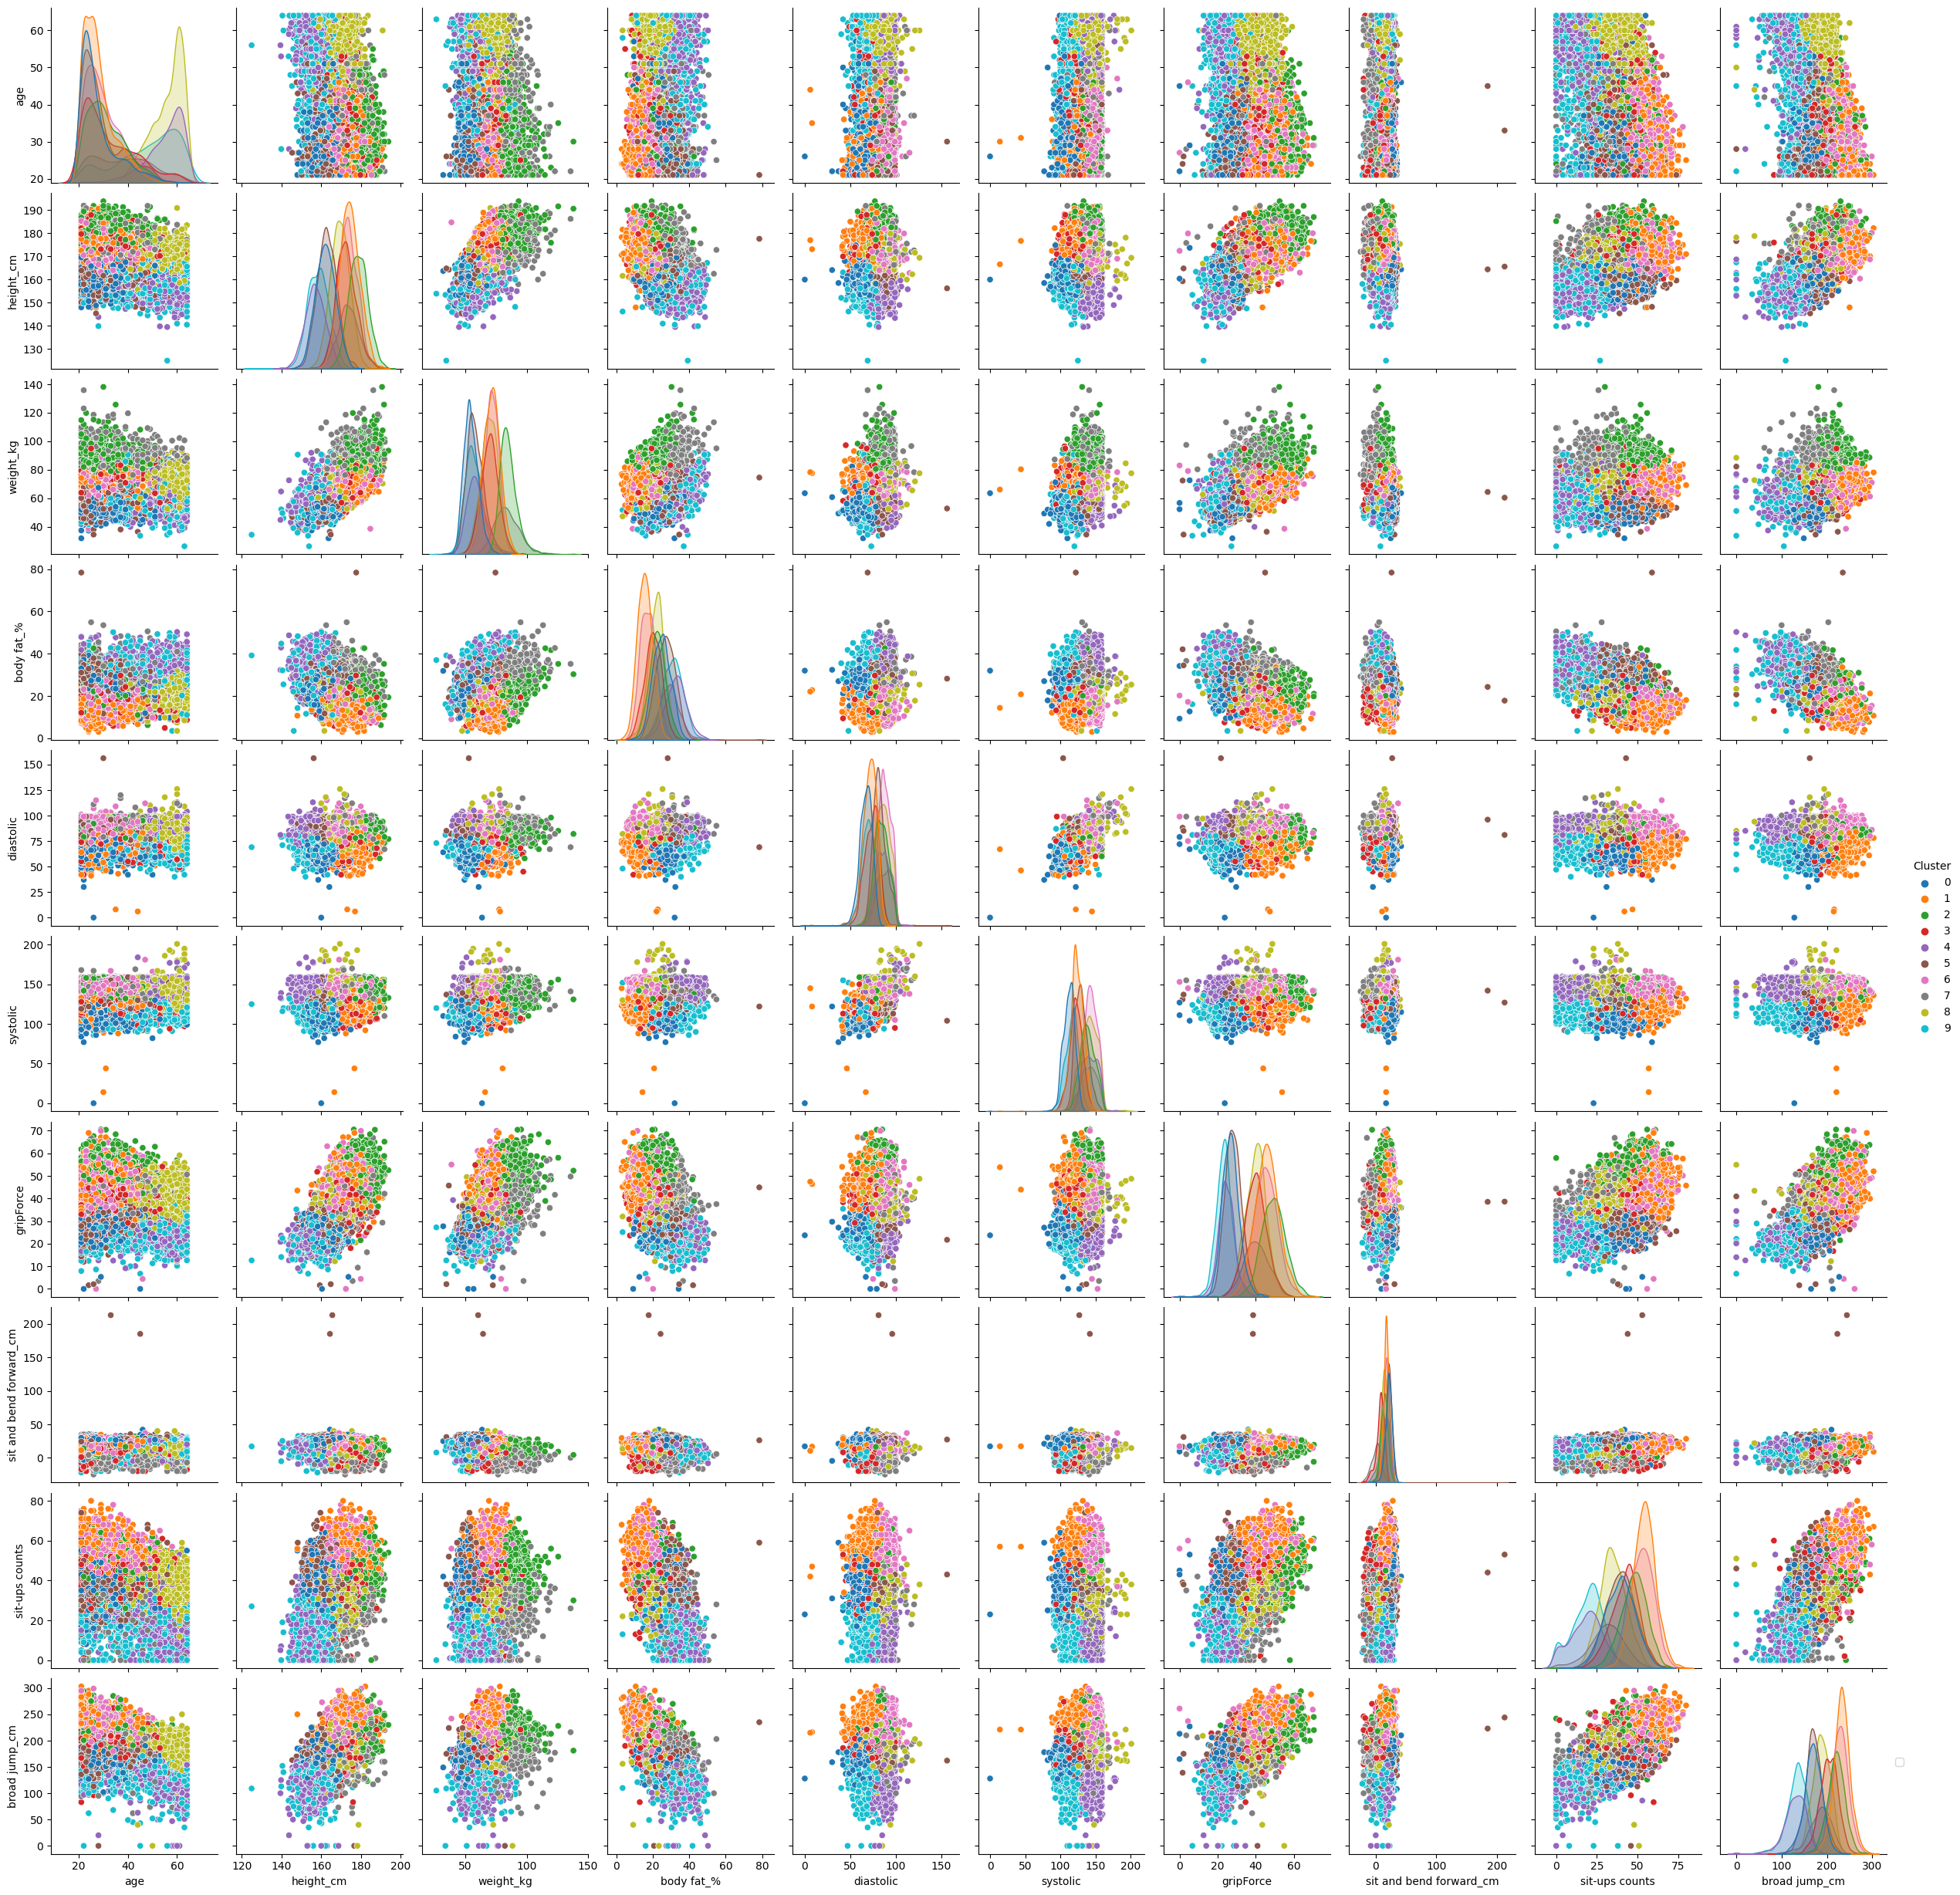

In [48]:
plt.figure(figsize=(7,7))
sns.pairplot(data=df, hue='Cluster', palette='tab10')
plt.legend( loc=(1.05,0.5))
plt.savefig('Figures/pairplot_clustering.JPG')
plt.show()

- When K = 10 it is difficult to build up a conclusion on the meaning on the clustered data. Which is why PCA is needed to be employed. However, based on viewing the data the following can be concluded
- Cluster 0: The dark blue this cluster seems to be merged with the other clusters and it difficult to come up with a conclusion for it 
- Cluster 1: The orange cluster this cluster seems to be on the: 
	- Low-end on the body fat percentage, diastolic rate, systolic rate
	- Mid-end on the age, weight, sit and bend forward distance
	- High end on the height, grip force, sit-ups, broad jumps
- Cluster 2: The green cluster 
	- Mid-end on the age, body fat percentage, diastolic rate, systolic rate, sit and bend forward
	- High end on the hight, weight, grip force,  situps, broad jump
- Cluster 3: The red this cluster seems to be merged with the other clusters and it difficult to come up with a conclusion for it
- Cluster 4: The purple cluster 
	- Low-end on the , 
	- Mid-end on the age, body fat percentage, diastolic rate, systolic rate, sit and bend forward distance
	- High end on the height, weight, grip force, sit ups, broad jump
- Cluster 5: The brown cluster this cluster seems to be merged with the other clusters and it difficult to come up 
- Cluster 6: The pink cluster 
	- Low-end on the , body fat percentage
	- Mid-end on the sit and bend forward distance
	- High end on the diastolic rate, systolic rate,  sit ups, broad jump
- Cluster 7: The grey cluster 
	- Low-end on the, sit ups count, 
	- Mid-end on the diastolic rate, systolic rate, grip force, sit and bend forward distance, and broad jumps 
	- High end on the height, weight, body fat percentage
- Cluster 8: The olive cluster 
	- Mid-end on the, age, height, weight, body fat percentage, diastolic rate, systolic rate, sit and bend forward distance
	- High end on the grip force, sit ups, broad jump
- Cluster 9: The light blue cluster 
	- Low-end on the, height, working, diastolic rate, systolic rate, grip force, sit ups, broad jump 
	- Mid-end on the  sit and bend forward distance
	- High end on the body fat percentage 

		
	


------------------------------------------------------------------------------------------------------------------------------------------------------------

### PCA
- PCA is a linear dimensionality reduction technique. PCA reduces the number correlated features (i.e., Dimensions) in an unsupervised ML problem

In [26]:
# df_ml_scaled from df_ml which has no Gender or Class 
df_ml_scaled

array([[-0.71743212,  0.44387298,  0.65215002, ...,  0.37731734,
         1.41696147,  0.67400862],
       [-0.8642197 , -0.42246548, -0.97473438, ...,  0.12898358,
         0.92663372,  0.97501314],
       [-0.42385695,  1.31021144,  0.88312744, ..., -0.37950936,
         0.64644644, -0.22900492],
       ...,
       [ 0.16329338,  1.02538783,  1.09234611, ...,  0.14080899,
         0.36625915,  0.97501314],
       [ 1.99813815, -2.66545136, -0.81572819, ..., -0.71062104,
        -2.7858478 , -2.88787813],
       [-0.20367558, -0.54114198, -0.11275345, ..., -0.9589548 ,
         0.78654008, -0.25408863]])

------------------------------------------------------------------------------------------------------------------------------------------------------------

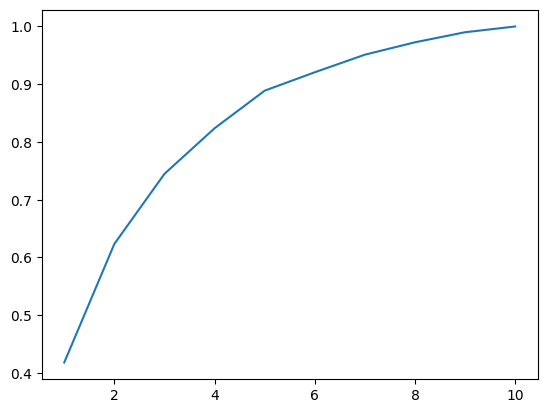

[0.41810583835077103, 0.6234936062227434, 0.7447642307933899, 0.8236971072889271, 0.8888171214445674, 0.9206975425952079, 0.9511520331928045, 0.9725981171937605, 0.9900248192849391, 1.0]


In [28]:
#Determine The Best # of Principal Compoenets
from sklearn.decomposition import PCA 
total_variance = []
for n in range (1,11): 
    ML_model = PCA(n_components=n)
    ML_model.fit_transform(df_ml_scaled) #The model will fit than transform the data from 11 rows to less rows. We are not predicting here
    total_variance.append(np.sum(ML_model.explained_variance_ratio_))

plt.plot(range (1,11),total_variance)
plt.show()
print(total_variance)

- The above results indicates:
    - if we have only 1 "Principal Component" PC we would have a data representation of 41.8 % 
    - if we have only 2 PCs we would have a data representation of 62.34 %. The first PC would be 41.8% of data representation and the second one is 20.54% of data representation
    - if we have only 3 PCs we would have a data representation of 74.5 %. The first PC would be 41.8% of data representation, the second one is 20.54% of data representation and the third PC would represent 16%
    - The more we increase the PCs the more data we can represent. 
    - For the works we would like to view the data in 2D therefore the works will focus on when N = 2


### PCA - N = 2

In [29]:
from sklearn.decomposition import PCA 
ML_model = PCA(n_components=2)
ML_model.fit_transform(df_ml_scaled) 
pc_results = ML_model.fit_transform(df_ml_scaled) 

In [30]:
PCA_df = pd.DataFrame(pc_results, columns = ['pc_1','pc_2'])

In [36]:
PCA_df['Cluster'] = df['Cluster'] ##Add the clustering column from df to PCA_df
PCA_df['class'] = df['class'] ##Add the clustering column from df to PCA_df
PCA_df['gender'] = df['gender'] ##Add the clustering column from df to PCA_df

print(PCA_df.head())

       pc_1      pc_2  Cluster Class class gender
0 -2.198794  0.464313        1     C     C      M
1 -0.707768  1.549424        1     A     A      M
2 -1.903292 -1.529722        2     C     C      M
3 -1.678080 -0.014424        6     B     B      M
4 -1.200588  1.438134        1     B     B      M


Scatter plot for when PCA = 2 and the hue is Clusters


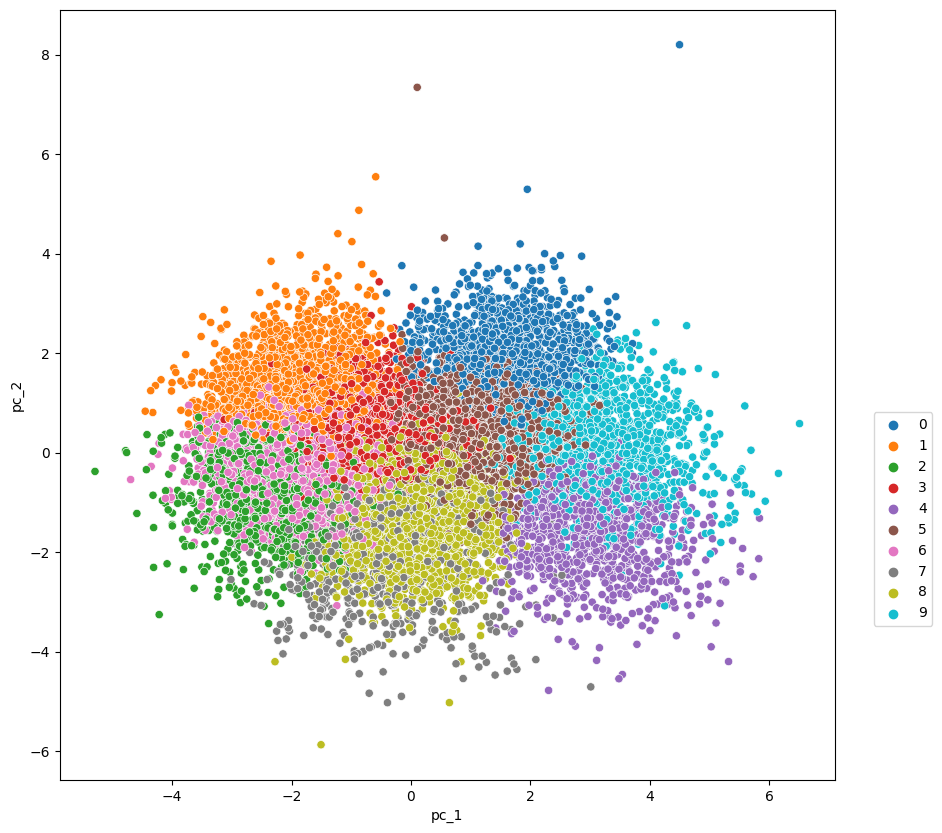

In [45]:
print("Scatter plot for when PCA = 2 and the hue is Clusters")
plt.figure(figsize=(10,10))
sns.scatterplot(data=PCA_df, x=PCA_df['pc_1'], y=PCA_df['pc_2'], hue=PCA_df['Cluster'], palette='tab10' )
plt.legend( loc=(1.05,0.2))
plt.show()

- The above figure most clusters seem to be seperated which means a if we needed to conduct a superviced ML algorithm we would not be faced with many issues 
- The following clusters could cause an issue due to their overlapping
    - The red (3) and brown (5) clusters 
    - The grey (7) and the olive (8) clusters 

Scatter plot for when PCA = 2 and the hue is Clusters & styles is the gender feature


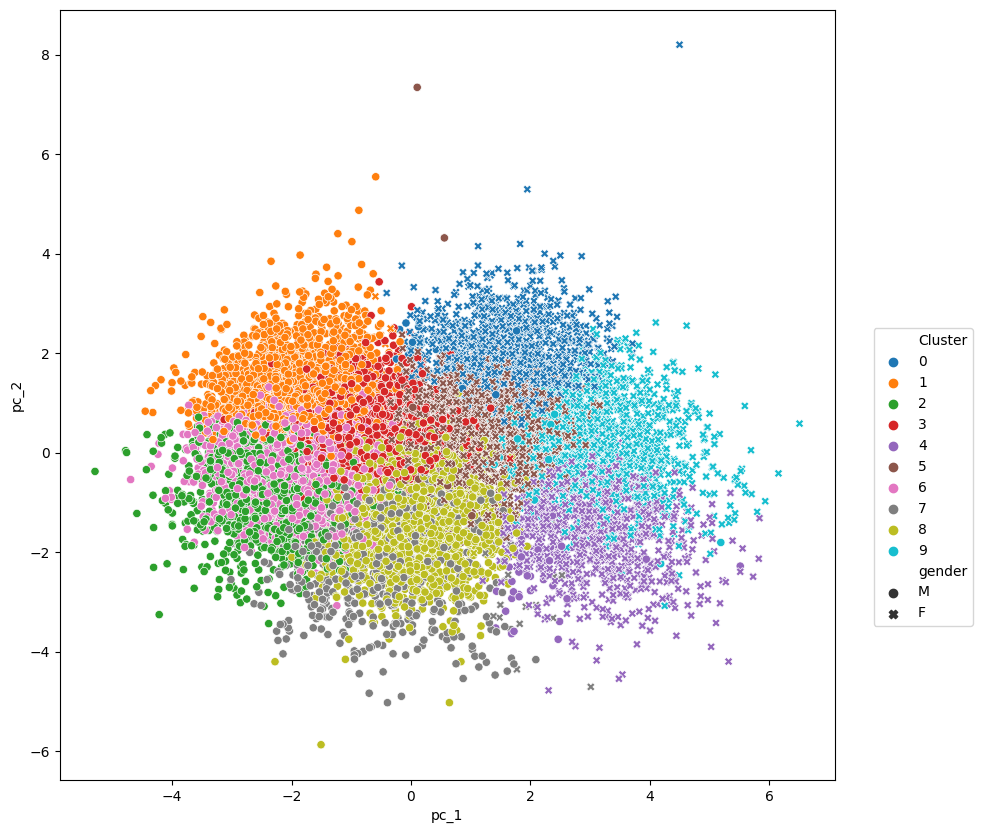

In [46]:
print("Scatter plot for when PCA = 2 and the hue is Clusters & styles is the gender feature")
plt.figure(figsize=(10,10))
sns.scatterplot(data=PCA_df, x=PCA_df['pc_1'], y=PCA_df['pc_2'], hue=PCA_df['Cluster'],  style_order =['M', 'F'], style = 'gender' , palette='tab10' )
plt.legend( loc=(1.05,0.2))
plt.show()


- the above figure attempts to classifies the data further by adding the "gender" feature as a style 
- Clusters orange (1), green (2), red (3), pink (6), grey (7), olive (8) seem to mainly contain males 
- Clusters grey (7) and purple (4) seem to contain both males and females. However, majority of the grey cluster are males and majority of the purple cluster are females 
- Clusters blue (0), light blue (9), purple (4), brown (5) seem to mainly contain females
- PCA was able to separate the data based on gender without having the data being trained on gender. There is not any cluster that is highly divided in its numbers when it comes to males and females 

Scatter plot for when PCA = 2 and the hue is Clusters & styles is the class feature


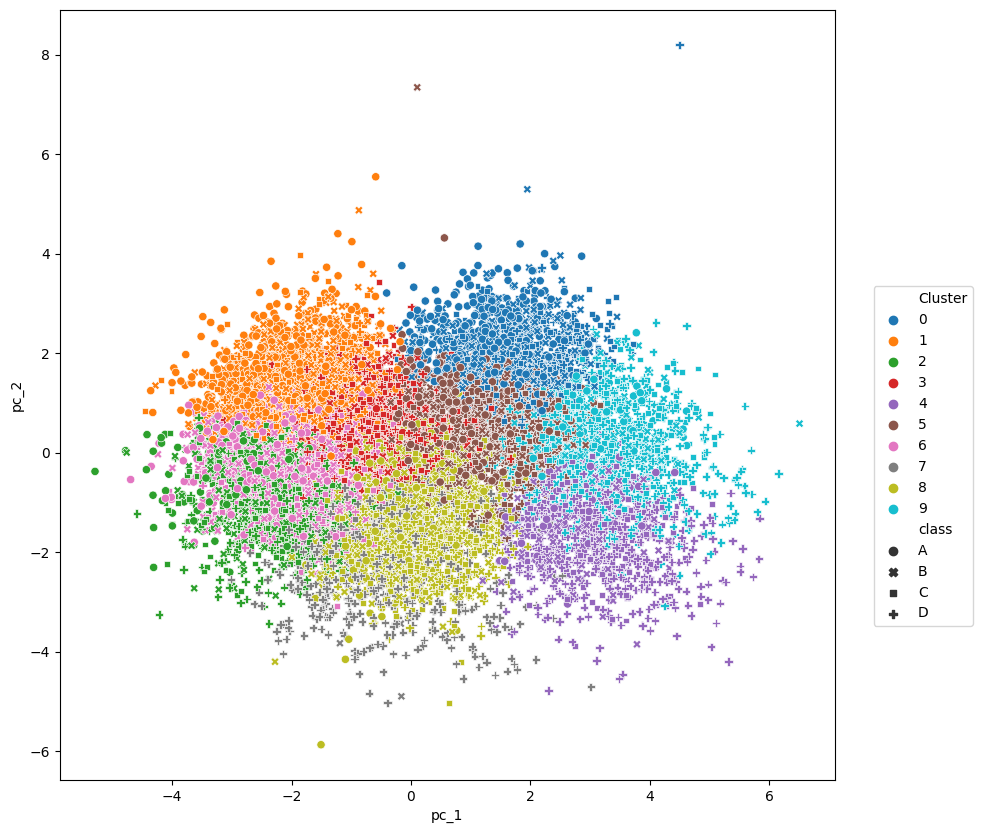

In [47]:
print("Scatter plot for when PCA = 2 and the hue is Clusters & styles is the class feature")
plt.figure(figsize=(10,10))
sns.scatterplot(data=PCA_df, x=PCA_df['pc_1'], y=PCA_df['pc_2'], hue=PCA_df['Cluster'],  style_order =['A', 'B', 'C', 'D'], style = 'class' , palette='tab10' )
plt.legend( loc=(1.05,0.2))
plt.show()

- The above figure utilizes the styles option to indicate the different performance classes. A being class with the best performance and D being the worst 
- Majority of clusters seem to share two classes at the same time 
- Cluster 0 the blue cluster seems to mainly have the A and B classes of data 
- Cluster 1 the orange cluster seems to mainly have the A and B classes of data 
- Cluster 2 the green cluster seems to share all classes but with majority being in class D
- Cluster 3 the red cluster this cluster is difficult to have a conclusion for due to the fact it is extremely being overlapped by the other clusters
- Cluster 4 the purple cluster this cluster seems to mainly include data from the D class and few others from the C class 
- Cluster 5 the brown cluster this cluster seems to have a mixture of classes but mainly classes A and B
- Cluster 6 the pink cluster this cluster seems to have a mixture of classes but mainly classes A and B
- Cluster 7 the grey cluster this cluster seems to mainly include data from class D 
- Cluster 8 the olive cluster this cluster seems to include all the classes equally 
- Cluster 9 the light blue cluster it seems to include all classes however there is a strong presence of classes C and D
- PCA was able to separate the data based on performance class without having the data being trained on that feature